In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
# out dir
out_dir = '../output/SupFig2d'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# read clustered raw TOPACIO data
df = pd.read_parquet('../input/Dataset1(TOPACIO)/TOPACIO_raw_cylinter_clustering.parquet')

channels = ['panCK', 'panCK', 'panCK']
clusters = [197, 174, 14]
colors = ['tab:green', 'tab:blue', 'tab:red']
heights = [0.015, 0.045, 0.075]

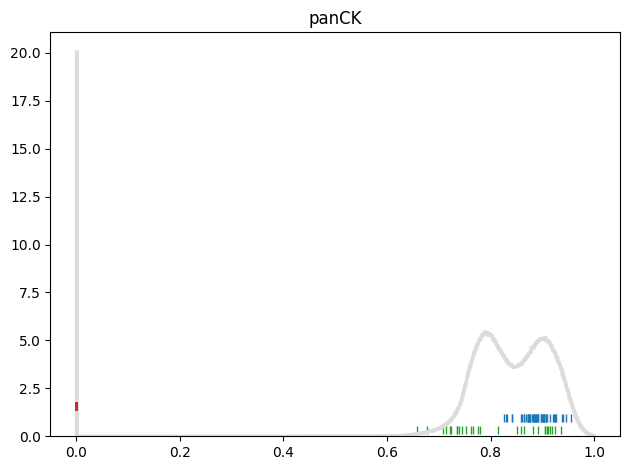

In [3]:
handles = []
for channel, cluster, color, height in zip(
  channels, clusters, colors, heights):

    g = plt.hist(
        df[channel], bins=600, density=True, histtype='step',
        linewidth=2.0, alpha=1.0, color='gainsboro'
        )

    # add rug plot for specific cluster/channel
    y_max = plt.gca().get_ylim()[1]
    test = df[df['cluster_2d'] == cluster]
    test = test.sample(n=50)
    for i in test.index:
        x = df[channel][df.index == i]
        if x.values == 0.0:
            zorder = 2.0
        else:
            zorder = 0.0
        plt.plot(
            x, y_max*height, marker='|', color=color, zorder=zorder
        )
    plt.title(channel)

    # color = g[2][0].get_facecolor()[:-1]
    # handles.append(
    #     Rectangle((0, 0), 1, 1, color=color, alpha=1.0, linewidth=0.0)
    #     )
    # plt.legend(handles, channels, fontsize=5.0, bbox_to_anchor=(1.01, 1.0))

plt.tight_layout()
plt.savefig(os.path.join(out_dir, f'topacio_rugplots.pdf'))
plt.show()
plt.close('all')